In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LogisticRegression


In [7]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [8]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [9]:
dataset = dataset.drop(["User ID"],axis=1)

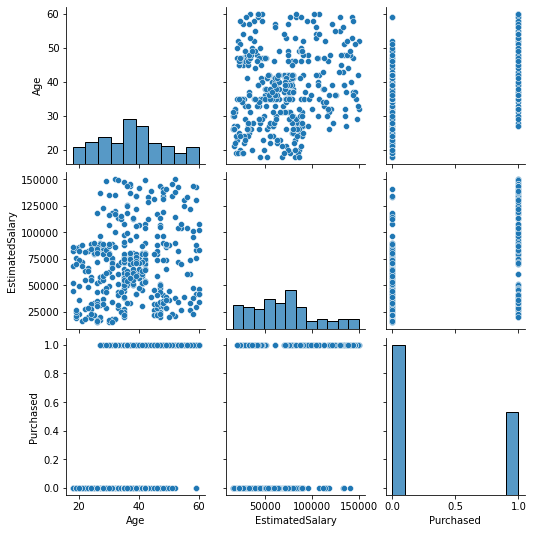

In [10]:
sns.pairplot(dataset)

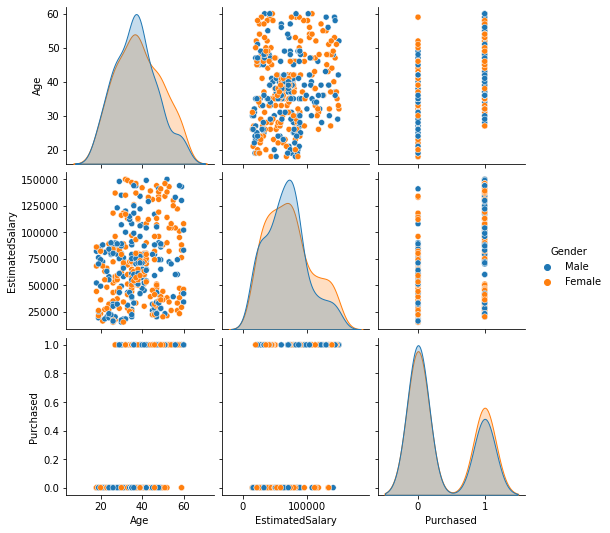

In [11]:
sns.pairplot(dataset,hue="Gender")

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
X = dataset.drop(["Purchased"],axis=1).values
y=  dataset["Purchased"].values

In [14]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X[:,:]

array([['Male', 19.0, 19000.0],
       ['Male', 35.0, 20000.0],
       ['Female', 26.0, 43000.0],
       ...,
       ['Female', 50.0, 20000.0],
       ['Male', 36.0, 33000.0],
       ['Female', 49.0, 36000.0]], dtype=object)

In [15]:
encoder_x = LabelEncoder()
X[:,0] = encoder_x.fit_transform(X[:,0])
X

array([[1, 19.0, 19000.0],
       [1, 35.0, 20000.0],
       [0, 26.0, 43000.0],
       ...,
       [0, 50.0, 20000.0],
       [1, 36.0, 33000.0],
       [0, 49.0, 36000.0]], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, 
                                                  random_state = 42) # 30%

In [17]:
model = LogisticRegression() # définition
model.fit(X_train,y_train) # l'entrainnement
model.score(X_test,y_test) # le score

0.6083333333333333

## Autres Methodes de classification

In [19]:
from sklearn.linear_model import SGDClassifier,RidgeClassifierCV
from sklearn.svm import LinearSVR,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB

In [24]:
model = LogisticRegression() # définition
model.fit(X_train,y_train) # l'entrainnement
model.score(X_test,y_test) # le score

0.6083333333333333

In [25]:
model = KNeighborsClassifier()# n_neighbors=5
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8166666666666667

In [26]:
model = SGDClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6083333333333333

In [27]:
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7333333333333333

In [31]:
from sklearn.naive_bayes import CategoricalNB,GaussianNB

In [32]:
model = CategoricalNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8083333333333333

In [33]:
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.925

In [34]:
y_pred = model.predict(X)

# les metriques de classification

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y,y_pred)

array([[243,  14],
       [ 35, 108]], dtype=int64)

In [25]:
from sklearn.metrics import plot_confusion_matrix

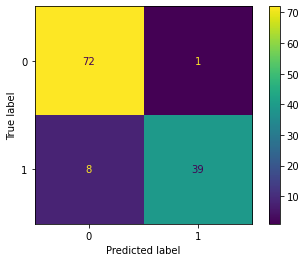

In [30]:
plot_confusion_matrix(model, X_test, y_test) 

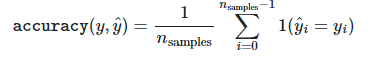

In [31]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y, y_pred)

0.8775

## Rapport de classement 

La classification_reportfonction crée un rapport texte montrant les principales métriques de classification. 

In [37]:
from sklearn.metrics import classification_report

In [39]:
target_names = ['class 0', 'class 1']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.95      0.91       257
     class 1       0.89      0.76      0.82       143

    accuracy                           0.88       400
   macro avg       0.88      0.85      0.86       400
weighted avg       0.88      0.88      0.88       400



In [45]:
from sklearn.metrics import fbeta_score,precision_score,recall_score,f1_score

In [46]:
f1_score(y,y_pred)

0.8150943396226414

In [41]:
fbeta_score(y,y_pred,beta=2)

0.7780979827089337

In [42]:
precision_score(y,y_pred)

0.8852459016393442

In [53]:
recall_score(y,y_pred)

0.7552447552447552

# Metriques de regression

## Erreur absolue moyenne  

La mean_absolute_errorfonction calcule l'erreur absolue moyenne , une métrique de risque correspondant à la valeur attendue de la perte d'erreur absolue.

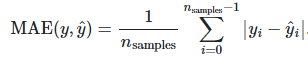

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(y,y_pred)

0.1225

## Erreur quadratique moyenne

La mean_squared_errorfonction calcule l' erreur quadratique moyenne , une mesure de risque correspondant à la valeur attendue de l'erreur ou de la perte quadratique (quadratique).

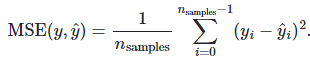

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y,y_pred)

0.1225

## le coefficient de détermination
Il représente la proportion de variance (de y) qui a été expliquée par les variables indépendantes du modèle.

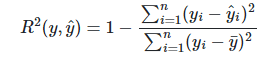

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y, y_pred)

0.4666811787434355